# Gaussian Distribution

정규분포는 단연 통계에서 가장 중요한 분포이다.

정규분포는 가우스(Johann Carl Friedrich Gauss)가 소행성 세레스를 찾을 때 발견했다.

가우스는 관측할때 오차가 정규분포를 따른다고 생각하였고, 따라서 앞으로 우리가 다룰 여러 통계, 기계학습의 문제에 정규분포를 활용하게 되므로

정규분포의 이론적 배경과 코드를 통한 실례를 보고자 한다.

## Univariate Gaussian Distribution

일변수 가우스 분포(Univariate Gaussian Distribution)는 다음과 같다.

$N(x|\mu,\sigma^2) \sim \frac {1} {\sqrt{2\pi\sigma^2}}exp(-\frac{1}{2\sigma^2}(x - \mu)^2)$

이때 $\mu$는 평균(mean)이며 $\sigma^2$는 분산(variance)이다. 따라서 $\sigma$는 표준편차(standard deviation)이다

## Multivariate Gaussian Distribution

다변수 가우스 분포(Multivariate Gaussian Distribution)는 다음과 같다

$N(x|\mu,\sum) \sim \frac {1}{\sqrt{2\pi}^{D/2}}\frac{1}{|\sum|^{1/2}}exp(-\frac{1}{2}(x - \mu)^T\sum^{-1}(x - \mu))$

이때 $\mu$는 평균(mean)이며  $\sum$는 공분산행렬(covariance matrix)이며 $D \times D$ 크기를 가진다

$\sum^{-1}$은 정확도(Accuracy)라고 불리우기도 하며 $\Lambda$로 표기하기도 한다.

## Affine Property and Affine Transformation

공분산 행렬은 아주 중요한 특징을 가지고 있는데 바로 대칭행렬이라는 점이다. 공분산의 정의를 이해하면 쉽게 파악할수 있다.

따라서 $\sum u_i = \lambda_iu_i$를 만드는 고유값(Eigen value) $\lambda_i$와 고유 벡터(Eigen value) $u_i$가 존재한다.

그리고 이 고유값과 고유벡터들을 기저로 직교공간(Othonormal basis system)을 생성할수 있다.

따라서 공분산행렬은 $\sum = \sum^D_{i=1}\lambda_iu_iu_i^T$로 표현될 수 있으며.

공분산행렬의 역행렬은 $\sum^{-1} = \sum^D_{i=1}\frac {1}{\lambda_i}u_iu_i^T$로 표현될 수 있다.

다변수 가우스분포를 잘 살펴보면 x값에 따른 분포는 $\Delta^2 = (x - \mu)^T\sum^{-1}(x - \mu)$ 에만 연관된다고 볼 수 있다.

이를 위의 성질을 이용하여 다시 표현하면 $\Delta^2 = \frac {(x - \mu)^TUU^T(x - \mu)} {\lambda^{1/2} \lambda^{1/2}}$ 로 표기할 수 있다.

이때 $U = \{u_i\}_{i=1}^D$ 고유벡터를 기저로 삼는 행렬이다. 따라서 $UU^T = I$이다.

위의 $\Delta^2$은 좌우 대칭이어서 분리될 수 있음을 확인할 수 있고, $x$에 영향을 끼치는 요소가 $U,\lambda,\mu$라는 것을 파악할 수 있다.

따라서 특정값을 따르는 정규 분포 $X$에 $U,\lambda,\mu$를 곱하거나 더할 때  기하학적으로 어떻게 가우스 분포에 영향을 끼치는지 코드를 통하여 살펴볼 것이다.

먼저 평균이 $(0,0)$이고 공분산이 $I$인 정규분포를 따르는 무작위 데이터 50개를 만든다. 이를 $X$라고 명명한다.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn

c:\python27\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
I = np.identity(2, dtype=np.float32)

In [3]:
np.random.seed(0)
data1 = np.random.multivariate_normal([0,0],I, 50).T

Covariance :
[[ 1.0818654  -0.03397485]
 [-0.03397485  0.98747635]]


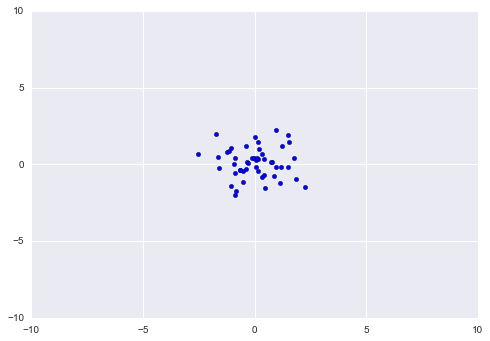

In [4]:
plt.scatter(data1[0,:], data1[1,:])
plt.axis([-10,10,-10,10])
print "Covariance :"
print np.cov(data1)

$X$에 $\lambda^{1/2}$를 곱해보자.

$\lambda^{1/2}X \sim N(X|0,\lambda)$  를 따르게 된다.

Covariance :
[[ 4.3274616  -0.20384912]
 [-0.20384912  8.88728719]]


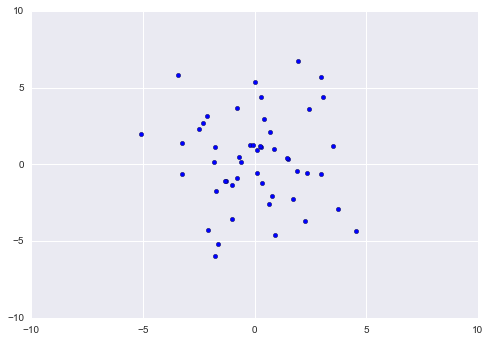

In [10]:
l_mat = np.array([[2,0],[0,3]])
data2 = l_mat.dot(data1)
plt.scatter(data2[0,:], data2[1,:])
plt.axis([-10,10,-10,10])
print "Covariance :"
print np.cov(data2)

공분산이 각각 $\lambda$만큼 변한 것을 확인할 수 있다. 이를 Scaling이라고 한다.

이제 $U$를 곱해보자. $U$를 곱하면 분포의 고유벡터가 바뀌어 회전하게 된다.

$U\lambda^{1/2}X \sim N(X|0,\sum)$  를 따르게 된다.

U : 
[[ 0.96 -0.28]
 [ 0.28  0.96]]
U^TU
[[ 1.  0.]
 [ 0.  1.]]
mean : 
[-0.05409246  0.30550387]


[-10, 10, -10, 10]

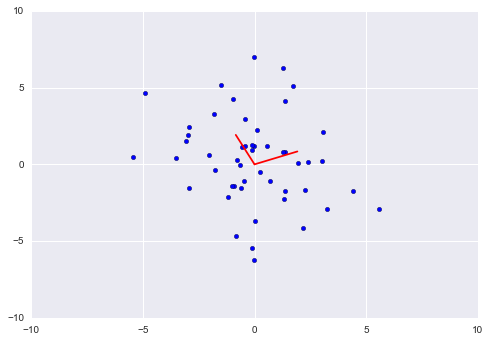

In [15]:
U = np.array([[0.96,-0.28],[0.28,0.96]])
print "U : "
print U
print "U^TU"
print U.dot(U.T)
data3 = U.dot(data2)
zeros = np.zeros((2))
print "mean : "
print data3.mean(axis=1)
plt.scatter(data3[0,:], data3[1,:])
y1 = np.hstack((zeros[:,np.newaxis],U[:,0][:,np.newaxis]))
y2 = np.hstack((zeros[:,np.newaxis],U[:,1][:,np.newaxis]))
plt.plot(y1[0,:]*2,y1[1,:]*3, color='red')
plt.plot(y2[0,:]*3,y2[1,:]*2, color='red')
plt.axis([-10,10,-10,10])

분포가 $16.26^{\circ}$도 회전하였고, 고유벡터가 바뀐것을 확인할수 있다. 이를 Rotation이라고 한다.

이제 $\mu$를 더하여 평균값을 바꾸어 보자. 

$U\lambda^{1/2}X + \mu \sim N(X|\mu,\sum)$ 를 따르게 된다.

mean :
[ 1.94590754  2.30550387]


[-10, 10, -10, 10]

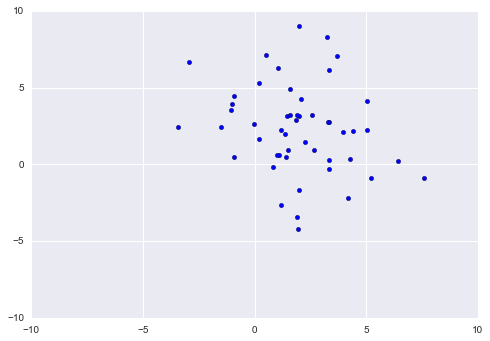

In [7]:
u = np.array([[2],[2]])
data4 = data3 + u
print "mean :"
print data4.mean(axis=1)
plt.scatter(data4[0,:], data4[1,:])
plt.axis([-10,10,-10,10])

평균값이 $(2,2)$만큼 옮겨 져서 분포가 전체적으로 옮겨진것을 확인할 수 있다. 이를 Shift라고 한다

이러한 방법으로 특정한 평균과 공분산을 가진 다변수정규분포를 쉽게 만들어 낼수 있다.

그리고 이러한 성질을 Affine Property라고 부른다. 이렇게 변화시키는 것을 Affine transformation이라고 부른다.

반대로 특정한 평균과 공분산을 가진 다변수정규분포로부터 정규화된(평균이 영행렬, 공분산이 단위행렬) 다변수정규분포를 만들어낼 수 있다.